<a href="https://colab.research.google.com/github/Danjstr/AIM-5001/blob/master/D_Strauss_w10_ass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import the libraries we will be using to tidy and transform our data.

In [1]:
# Import NumPy library
import numpy as np
# Import Pandas library
import pandas as pd
# Load the pyplot function from the matplotlib library
import matplotlib.pyplot as plt
#import Seaborn
import seaborn as sns


Import the csv file that we uploaded from to github and show the results on the screen.

Part 1:

In [3]:

#Import the CSV with data and assign it to the name Airlines
Airlines = pd.read_csv('https://raw.githubusercontent.com/Danjstr/AIM-5001/master/airlines.csv') 

#Show the result
Airlines

,Unnamed: 0,Unnamed: 1,Los Angeles,Phoenix,San Diego,San Francisco,Seattle
0,ALASKA,on time,497.0,221.0,212.0,503.0,1841.0
1,NaN,delayed,62.0,12.0,20.0,102.0,305.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AM WEST,on time,694.0,4840.0,383.0,320.0,201.0
4,NaN,delayed,117.0,415.0,65.0,129.0,61.0


Part 2:

Rename our two unnamed columns as States and on_Time_or_delayed respectively. So we can replace the Unnamed: 0 and Unnamed: 1.

In [4]:
#Rename our two unnamed columns as States and on_Time_or_delayed respectively
Airlines=Airlines.rename(columns={"Unnamed: 0": "States", "Unnamed: 1": "on_Time_or_delayed"})
#Show the result
Airlines

,States,on_Time_or_delayed,Los Angeles,Phoenix,San Diego,San Francisco,Seattle
0,ALASKA,on time,497.0,221.0,212.0,503.0,1841.0
1,NaN,delayed,62.0,12.0,20.0,102.0,305.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AM WEST,on time,694.0,4840.0,383.0,320.0,201.0
4,NaN,delayed,117.0,415.0,65.0,129.0,61.0


Remove the second row by dropping any row will all values in the row equal to NAN.

In [5]:
#Drop the row coresponding to index two using dropna(how = 'all')
Airlines=Airlines.dropna(how='all') 
#Show the result
Airlines

,States,on_Time_or_delayed,Los Angeles,Phoenix,San Diego,San Francisco,Seattle
0,ALASKA,on time,497.0,221.0,212.0,503.0,1841.0
1,NaN,delayed,62.0,12.0,20.0,102.0,305.0
3,AM WEST,on time,694.0,4840.0,383.0,320.0,201.0
4,NaN,delayed,117.0,415.0,65.0,129.0,61.0


Foreward fill the States row to replace the NAN values with the corresponding state.

In [6]:
#Foreward fill the Na values in the State column
Airelines=Airlines.ffill()
#Show the result
Airelines

,States,on_Time_or_delayed,Los Angeles,Phoenix,San Diego,San Francisco,Seattle
0,ALASKA,on time,497.0,221.0,212.0,503.0,1841.0
1,ALASKA,delayed,62.0,12.0,20.0,102.0,305.0
3,AM WEST,on time,694.0,4840.0,383.0,320.0,201.0
4,AM WEST,delayed,117.0,415.0,65.0,129.0,61.0


Melt the dataframe on States and on_Time_or_delayed to shift the data into long format.

In [7]:
#Covert to long format by melting on States and on_Time_or_delayed
melted = pd.melt(Airelines, ['States','on_Time_or_delayed'])
#Show the result
melted

,States,on_Time_or_delayed,variable,value
0,ALASKA,on time,Los Angeles,497.0
1,ALASKA,delayed,Los Angeles,62.0
2,AM WEST,on time,Los Angeles,694.0
3,AM WEST,delayed,Los Angeles,117.0
4,ALASKA,on time,Phoenix,221.0
5,ALASKA,delayed,Phoenix,12.0
6,AM WEST,on time,Phoenix,4840.0
7,AM WEST,delayed,Phoenix,415.0
8,ALASKA,on time,San Diego,212.0
9,ALASKA,delayed,San Diego,20.0


Rename our variable and value columns as City and Number_of_flights respectively so that the column name more directly reflects the values in the columns.

In [8]:
#Rename our Variable and Value columns as City and Number_of_flights respectively
melted=melted.rename(columns={'variable':'City'	,'value':'Number_of_flights'})
#Show the result
melted

,States,on_Time_or_delayed,City,Number_of_flights
0,ALASKA,on time,Los Angeles,497.0
1,ALASKA,delayed,Los Angeles,62.0
2,AM WEST,on time,Los Angeles,694.0
3,AM WEST,delayed,Los Angeles,117.0
4,ALASKA,on time,Phoenix,221.0
5,ALASKA,delayed,Phoenix,12.0
6,AM WEST,on time,Phoenix,4840.0
7,AM WEST,delayed,Phoenix,415.0
8,ALASKA,on time,San Diego,212.0
9,ALASKA,delayed,San Diego,20.0


Part 3:

Create a pivot table that uses a hierarchical index with states and City as the two indexes. This will provide us a dataframe with our delayed data in a separate column from the on time data.

In [9]:
#pivot the table and create a hierarchical index with states and city as the two indexes
Pivot = melted.pivot_table(index=['States','City'],
                             columns='on_Time_or_delayed',
                             values='Number_of_flights')
#Show the result
Pivot

on_Time_or_delayed     delayed  on time
States  City                           
ALASKA  Los Angeles       62.0    497.0
        Phoenix           12.0    221.0
        San Diego         20.0    212.0
        San Francisco    102.0    503.0
        Seattle          305.0   1841.0
AM WEST Los Angeles      117.0    694.0
        Phoenix          415.0   4840.0
        San Diego         65.0    383.0
        San Francisco    129.0    320.0
        Seattle           61.0    201.0

Sort the results by City so that Competing airlines are arranged next to each other by city. This is mostly for readability.

In [10]:
#Sort the values by City so that it is more readable
pivot=Pivot.sort_values('City')
#Show the result
pivot

,on_Time_or_delayed,delayed,on time
States,City,,
ALASKA,Los Angeles,62.0,497.0
AM WEST,Los Angeles,117.0,694.0
ALASKA,Phoenix,12.0,221.0
AM WEST,Phoenix,415.0,4840.0
ALASKA,San Diego,20.0,212.0
AM WEST,San Diego,65.0,383.0
ALASKA,San Francisco,102.0,503.0
AM WEST,San Francisco,129.0,320.0
ALASKA,Seattle,305.0,1841.0


Reset the index. This will make plotting much easier as we will have turned states and City back into columns. 

In [11]:
#Reset the index to turn States and city back into column values
pivot.reset_index( inplace=True)
#Show the result
pivot


on_Time_or_delayed,States,City,delayed,on time
0,ALASKA,Los Angeles,62.0,497.0
1,AM WEST,Los Angeles,117.0,694.0
2,ALASKA,Phoenix,12.0,221.0
3,AM WEST,Phoenix,415.0,4840.0
4,ALASKA,San Diego,20.0,212.0
5,AM WEST,San Diego,65.0,383.0
6,ALASKA,San Francisco,102.0,503.0
7,AM WEST,San Francisco,129.0,320.0
8,ALASKA,Seattle,305.0,1841.0
9,AM WEST,Seattle,61.0,201.0


Create a new column that sums up the on time and delayed columns. We will use this to calculate the percentage of on time flights.

In [12]:
#Create Pivot_1 and pass pivot into it.
pivot_1=pivot
#Create a new column sum that contains the sum of delayed and on time
pivot_1['sum'] = pivot_1["on time"] + pivot_1["delayed"]
#Show the result
pivot_1

on_Time_or_delayed,States,City,delayed,on time,sum
0,ALASKA,Los Angeles,62.0,497.0,559.0
1,AM WEST,Los Angeles,117.0,694.0,811.0
2,ALASKA,Phoenix,12.0,221.0,233.0
3,AM WEST,Phoenix,415.0,4840.0,5255.0
4,ALASKA,San Diego,20.0,212.0,232.0
5,AM WEST,San Diego,65.0,383.0,448.0
6,ALASKA,San Francisco,102.0,503.0,605.0
7,AM WEST,San Francisco,129.0,320.0,449.0
8,ALASKA,Seattle,305.0,1841.0,2146.0
9,AM WEST,Seattle,61.0,201.0,262.0


Create a new column Percent_on_time by dividing our on time column by the sum column. This will give us the percentage of the number of flights that were on time. Pass this all into a new datframe pivot_1.

In [13]:
#Create a new column Percent_on_time by dividing our on time column by the sum column
pivot_1['Percent_on_time'] = pivot_1['on time']/pivot_1["sum"]
#Show the result
pivot_1

on_Time_or_delayed,States,City,delayed,on time,sum,Percent_on_time
0,ALASKA,Los Angeles,62.0,497.0,559.0,0.889088
1,AM WEST,Los Angeles,117.0,694.0,811.0,0.855734
2,ALASKA,Phoenix,12.0,221.0,233.0,0.948498
3,AM WEST,Phoenix,415.0,4840.0,5255.0,0.921028
4,ALASKA,San Diego,20.0,212.0,232.0,0.913793
5,AM WEST,San Diego,65.0,383.0,448.0,0.854911
6,ALASKA,San Francisco,102.0,503.0,605.0,0.831405
7,AM WEST,San Francisco,129.0,320.0,449.0,0.712695
8,ALASKA,Seattle,305.0,1841.0,2146.0,0.857875
9,AM WEST,Seattle,61.0,201.0,262.0,0.767176


Plot percent_on_time on the y-axis and City on the x-axis with the results colored by State.

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

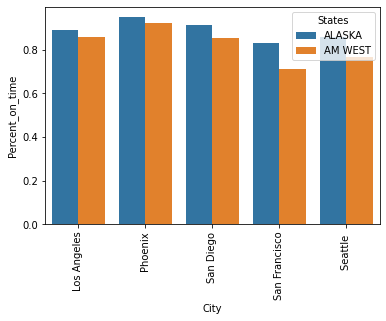

In [14]:
#Plot  percent_on_time on the y-axis by City, and color the result by State
sns.barplot(data= pivot_1,x='City', y='Percent_on_time', hue = 'States') 
plt.xticks(rotation=90)



Question 1: For each city, which airline had the best on-time performance? 
Answer 1: For every city in the dataframe Alaskan airlines outperformed AM West in the percentage of flights that were on time. 

Question 2: Which airline had the best overall on-time performance?
Answer 2: As Alaskan airlines outperformed AM West in every city it is clear that Alaskan airlines had the best overall performance.


Part 4:

Below are two examples of the same dataframe in a more readable wide format. The first is my proposed wide format as viewed with a simple print. The second one, the image, is an example of the same dataframe when viewed as a csv on github.

In [18]:
New_wide=Pivot.unstack()
New_wide


on_Time_or_delayed     delayed          ...       on time         
City               Los Angeles Phoenix  ... San Francisco Seattle 
States                                  ...                       
ALASKA                    62.0    12.0  ...         503.0   1841.0
AM WEST                  117.0   415.0  ...         320.0    201.0

[2 rows x 10 columns]

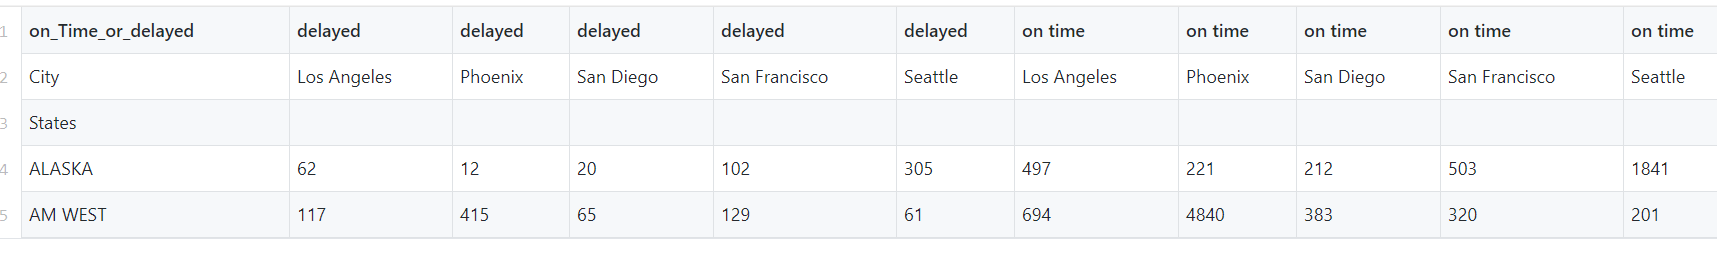